# Begriffe 4: Die Transferfunktion

Wie gesehen reicht eine einfache lineare Funktion (wie die Identität) als Transferfunktion (Übergangsfunktion) zwischen zwei Schichten in einem KNN nicht aus, da die die Kombination linearer Funktioen wieder linear sind.
Beim Übergang zwischen den Schichten eines KNN ist der Einsatz von linearen Funktionen nicht sinnvoll, da die Kombination linearer Funktionen wieder eine lineare Funktion ergibt. In einem solchen Fall ließen sich die beiden Schichten durch eine einzelne ersetzen. 

Wir brauchen daher als Übergangsfunktion etwas anderes. Plausibel sind folgende Anforderungen an die Funktion:

* Sie sollte nicht-linear sein
* Sie sollte einen Wertebereich zwischen 0 und 1 haben - keine Verstärkung oder etwa sogar Vorzeichenumkehr
* Sie sollte monoton steigend sein - stärkerer Input führt zu stärkerem Output
* Sie sollte einfach zu differenzieren sein - dadurch wird einfache *Backpropagation* möglich


### Sigmoidale Funktion

Dies führt schnell auf eine S-förmige Gestalt der Funktion, woher die Bezeichnung __Sigmoidale Funktion__ oder __Sigmoid-Funktion__ stammt. Am häufigsten wird die __Logistische Funktion__ eingesetzt:
$$\sigma(x) := \frac{1} {1 + e^{-x}}$$
Neben ihrem schönen S-förmigen Verlauf ist ihre Ableitung recht einfach:
$$\sigma'(x) = \sigma(x)(1-\sigma(x)).$$

Hat man also $\sigma(x)$, berechnet, so muss man für die Berechnung von $\sigma'(x)$ nur noch multiplizieren. 

### ReLU-Funktion

Eine weitere Funktionsart, die häufig als Transferfunktion zum Einsatz kommt, sind die **ReLU-Funktionen**:

$$ \text{relu}(r) := max(0,x) $$

ReLU steht für **Rectified Linar Unit**, wobei **Rectifier** für *Gleichrichter* steht. Die Funktion

$$ \text{leakyRelu}(r) := max(0.2*x,x) $$

wird als **Leaky-ReLU-Funktion** bezeichnet bezeichnet. Für Werte größer 0 reicht sie den Wert einfach durch, Werte kleiner 0 werden mit 0,2 multipliziert und somit verkleinert.

### Graphische Darstellung

Die Implementierung mit NumPy ist wieder simpel:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

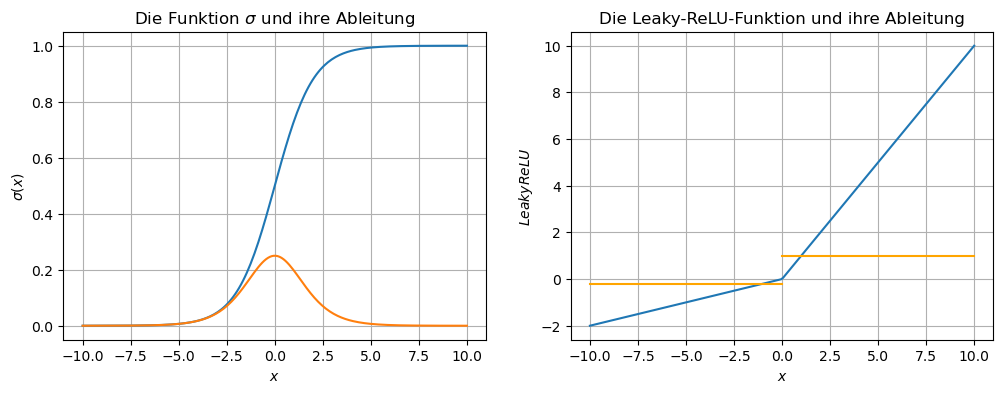

In [2]:
plt.figure( figsize=(12, 4))

def sigma(x):
    return 1 / (1 + np.exp(-x))

def sigma_1(x):
    return sigma(x) * (1- sigma(x))

def leaky_relu(x):
    return np.maximum(0.2 * x,x)

def leaky_relu_1(x):
    return np.array([0.2 if x < 0 else 1 for x in x] )


def do_plot(nr, name, f,f_1):
    plt.subplot(1,2,1)
    plt.title('Die Funktion $' + name + '$ und ihre Ableitung')
    plt.xlabel('$x$')
    plt.ylabel('$' + name + '(x)$')
    plt.grid(True)
    plt.plot(x,f(x))
    plt.plot(x,f_1(x))

x = np.linspace(-10,10,200)

do_plot(1,'\sigma',sigma,sigma_1)



plt.subplot(1,2,2)
plt.title('Die Leaky-ReLU-Funktion und ihre Ableitung')
plt.xlabel('$x$')
plt.ylabel('$Leaky ReLU$')
plt.grid(True)
plt.plot(x,leaky_relu(x))
plt.plot([-10,0],[-0.2,-.2],color='Orange')
plt.plot([0,10],[1,1],color='Orange')
plt.show()

plt.show()

#### Berechnung der Ableitung der Logistischen Funktion

Die logistische Funktion lautet: $$\sigma(x) := \frac{1}{1+e^{-x}}.$$  Es ist einerseits

$$ \sigma'(x) = (\frac{1}{1+e^{-x}})' = - \frac{1}{(1+e^{-x})^2} e^{-x} (-1) = \frac{e^{-x}}{(1+e^{-x})^2} $$

mit zweimaliger Anwendung der Kettenregel, und andererseits

$$ \sigma(x) (1-\sigma(x)) = (\frac{1}{1+e^{-x}}) (1 -(\frac{1}{1+e^{-x}}) = \frac{1}{1+e^{-x}} -\frac{1}{(1+e^{-x})^2} = \frac{1 - e^{-x}-1}{(1+e^{-x})^2} = \frac{e^{-x}}{(1+e^{-x})^2}$$

Die beiden rechten Seiten stimmen überein, also gilt $$ \sigma'(x) = \sigma(x) (1-\sigma(x)). $$

Man muss zur Berechnung der Ableitung von $\sigma$ wieder nur $\sigma$ selbst berechnen.

### Links

[1] [Logistische Funktion bei Wikipedia](https://de.wikipedia.org/wiki/Logistische_Funktion)